In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
wrn_run2 = np.load('bma_results/wrn_scale_05_run2_ensembles.npz')
wrn_run3 = np.load('bma_results/wrn_scale_05_run3_ensembles.npz')
wrn_run3_diag = np.load('bma_results/wrn_run3_diag_ensembles.npz')
wrn_run2_diag = np.load('bma_results/wrn_run2_diag_ensembles.npz')

In [3]:
wrn_run2_preds = wrn_run2['predictions']
wrn_run2_targets = wrn_run2['targets']

wrn_run3_preds = wrn_run3['predictions']
wrn_run3_targets = wrn_run3['targets']

In [4]:
wrn_run3_diag_preds = wrn_run3_diag['predictions']
wrn_run3_diag_targets = wrn_run3_diag['targets']

wrn_run2_diag_preds = wrn_run2_diag['predictions']
wrn_run2_diag_targets = wrn_run2_diag['targets']

In [5]:
def nll(outputs, labels):
    # from https://github.com/wjmaddox/private_swa_uncertainties/blob/master/experiments/uncertainty/run_unc_metrics.py#L64-L79
    labels = labels.astype(int)
    idx = (np.arange(labels.size), labels)
    ps = outputs[idx]
    nll = -np.sum(np.log(ps))
    return nll / labels.shape[0]

In [6]:
def cum_pred(preds, targets, randomize = True):
    
    accuracies = np.zeros(preds.shape[2])
    nlls = np.zeros(preds.shape[2])
    
    for i in range(preds.shape[2]):
        if i%10 is 0:
            print(i)
        if randomize:
            #choose a random ensemble size of size i
            current_ensemble = np.sum(preds[:, :, np.random.choice(preds.shape[2], i+1, replace = False)],2)
        else:
            current_ensemble = np.sum(preds[:, :, 0:(i+1)], 2)
            
        current_ensemble = current_ensemble * preds.shape[2] # fixes scaling bug in the ensembling script
        
        ensemble_preds = np.argmax(current_ensemble, axis=1)
        current_accuracy = np.mean(ensemble_preds == targets)
        current_loss = nll(outputs=current_ensemble/(i+1), labels=targets)
        
        accuracies[i] = current_accuracy
        nlls[i] = current_loss
    
    return accuracies, nlls

In [7]:
(np.argmax(np.sum(wrn_run2_diag_preds[:, :, np.random.choice(100, 100, replace = False)] ,2),1) == wrn_run2_targets).mean()

0.8252

In [8]:
run2_accs, run2_nlls = cum_pred(wrn_run2_preds, wrn_run2_targets, randomize=False)
run3_accs, run3_nlls = cum_pred(wrn_run3_preds, wrn_run3_targets, randomize=False)

run2_diag_accs, run2_diag_nlls = cum_pred(wrn_run2_diag_preds, wrn_run2_diag_targets, randomize=False)
run3_diag_accs, run3_diag_nlls = cum_pred(wrn_run3_diag_preds, wrn_run3_diag_targets, randomize=False)

0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90


In [9]:
run_accs = (run2_nlls + run3_nlls) / 2
run_diag_accs = (run2_diag_nlls + run3_diag_nlls) / 2

In [10]:
swa_mean = (0.6700 + 0.6706) / 2 # from pavels spreadsheet
sgd_mean = 0.7900 # from timur's repo

Text(0.5,1,'WideResNet28x10 CIFAR100')

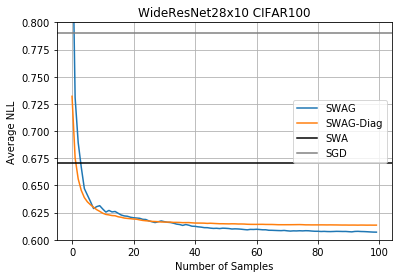

In [11]:
plt.plot(run_accs, label = 'SWAG')
plt.plot(run_diag_accs, label = 'SWAG-Diag')
plt.axhline(y=swa_mean, label = 'SWA', c='black')
plt.axhline(y=sgd_mean, label = 'SGD', c='gray')
plt.legend()
plt.grid()
plt.ylim((0.6, 0.8))
plt.ylabel('Average NLL')
plt.xlabel('Number of Samples')
plt.title('WideResNet28x10 CIFAR100')

Text(0.5,0,'Number of Samples')

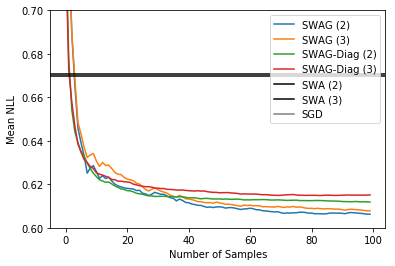

In [12]:
plt.plot(run2_nlls, label='SWAG (2)')
plt.plot(run3_nlls, label='SWAG (3)')
plt.plot(run2_diag_nlls, label='SWAG-Diag (2)')
plt.plot(run3_diag_nlls, label='SWAG-Diag (3)')
plt.axhline(y=0.6700, label='SWA (2)', c='black')
plt.axhline(y=0.6706, label='SWA (3)', c='black')
plt.axhline(y=0.79, label='SGD', c='gray')
plt.legend()
plt.ylim((0.6,0.7))
plt.ylabel('Mean NLL')
plt.xlabel('Number of Samples')

## Now Randomized Ensembles (for Variance)

In [13]:
np.random.seed(1)

r_run2_accs = np.zeros((100, 10))
r_run3_accs = np.zeros((100, 10))
r_run2_diag_accs = np.zeros((100, 10))
r_run3_diag_accs = np.zeros((100, 10))

r_run2_nlls = np.zeros((100, 10))
r_run3_nlls = np.zeros((100, 10))
r_run2_diag_nlls = np.zeros((100, 10))
r_run3_diag_nlls = np.zeros((100, 10))

for i in range(10):
    r_run2_accs[:, i], r_run2_nlls[:, i] = cum_pred(wrn_run2_preds, wrn_run2_targets, randomize=True)
    r_run3_accs[:, i], r_run3_nlls[:, i] = cum_pred(wrn_run3_preds, wrn_run3_targets, randomize=True)

    r_run2_diag_accs[:, i], r_run2_diag_nlls[:, i] = cum_pred(wrn_run2_diag_preds, wrn_run2_diag_targets, 
                                                              randomize=True)
    r_run3_diag_accs[:, i], r_run3_diag_nlls[:, i] = cum_pred(wrn_run3_diag_preds, wrn_run3_diag_targets, 
                                                              randomize=True)

0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40


In [14]:
def plot_error_bar(xaxis, yaxis, yerr, label, color, fb_alpha):
    plt.fill_between(xaxis, yaxis-yerr, yaxis+yerr, color=color, alpha=fb_alpha)
    plt.plot(xaxis, yaxis, label=label, c=color)

Text(0.5,1,'WideResNet28x10 CIFAR100')

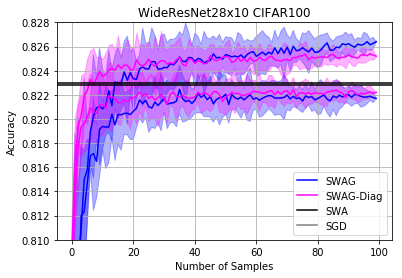

In [15]:
plot_error_bar(range(100), np.mean(r_run2_accs, 1), 2*np.std(r_run2_accs,1), label='SWAG', color='blue', fb_alpha=0.3)
plot_error_bar(range(100), np.mean(r_run3_accs, 1), 2*np.std(r_run3_accs,1), label=None, color='blue', fb_alpha=0.3)

plot_error_bar(range(100), np.mean(r_run2_diag_accs, 1), 2*np.std(r_run2_diag_accs,1), label='SWAG-Diag', color='magenta', fb_alpha=0.3)
plot_error_bar(range(100), np.mean(r_run3_diag_accs, 1), 2*np.std(r_run3_diag_accs,1), label=None, color='magenta', fb_alpha=0.3)

plt.axhline(y=0.8228, label = 'SWA', c='black')
plt.axhline(y=0.823, c='black')
plt.axhline(y=sgd_mean, label = 'SGD', c='gray')
plt.legend()
plt.grid()
plt.ylim((0.81, 0.828))
plt.ylabel('Accuracy')
plt.xlabel('Number of Samples')
plt.title('WideResNet28x10 CIFAR100')

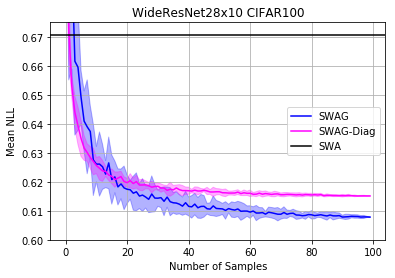

In [16]:
#plot_error_bar(range(100), np.mean(r_run2_nlls, 1), 2*np.std(r_run2_nlls,1), 
#               label='SWAG', color='blue', fb_alpha=0.3)
plot_error_bar(range(100), np.mean(r_run3_nlls, 1), 2*np.std(r_run3_nlls,1), 
               label='SWAG', color='blue', fb_alpha=0.3)

#plot_error_bar(range(100), np.mean(r_run2_diag_nlls, 1), 2*np.std(r_run2_diag_nlls,1), 
#               label='SWAG-Diag', color='magenta', fb_alpha=0.3)
plot_error_bar(range(100), np.mean(r_run3_diag_nlls, 1), 2*np.std(r_run3_diag_nlls,1), 
               label='SWAG-Diag', color='magenta', fb_alpha=0.3)

plt.axhline(y=0.6706, label = 'SWA', c='black')
#plt.axhline(y=0.823, c='black')
#plt.axhline(y=sgd_mean, label = 'SGD', c='gray')
plt.legend()
plt.grid()
plt.ylim((0.6, 0.675))
plt.ylabel('Mean NLL')
plt.xlabel('Number of Samples')
plt.title('WideResNet28x10 CIFAR100')
plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/pics/wrn_bma_c100_nll.pdf')

## Scaling

In [17]:
#wrn_2_scale_1 = np.load('wrn_run2_')
wrn_3_scale_1 = np.load('bma_results/wrn_run3_ensembles.npz')

wrn_2_scale_s2 = np.load('bma_results/wrn_scale_s2_run2_ensembles.npz')
wrn_3_scale_s2 = np.load('bma_results/wrn_scale_s2_run3_ensembles.npz')

FileNotFoundError: [Errno 2] No such file or directory: 'wrn_run3_ensembles.npz'

In [58]:
#wrn_2_scale_1_preds, wrn_2_scale_1_targets = wrn_2_scale_1['predictions'], wrn_2_scale_1['targets']
wrn_3_scale_1_preds, wrn_3_scale_1_targets = wrn_3_scale_1['predictions'], wrn_3_scale_1['targets']
wrn_2_scale_s2_preds, wrn_2_scale_s2_targets = wrn_2_scale_s2['predictions'], wrn_2_scale_s2['targets']
wrn_3_scale_s2_preds, wrn_3_scale_s2_targets = wrn_3_scale_s2['predictions'], wrn_3_scale_s2['targets']


In [59]:
wrn_2_scale_12 = np.load('bma_results/wrn_scale_125_run2_ensembles.npz')
wrn_3_scale_12 = np.load('bma_results/wrn_scale_125_run3_ensembles.npz')

wrn_2_scale_12_preds, wrn_2_scale_12_targets = wrn_2_scale_12['predictions'], wrn_2_scale_12['targets']
wrn_3_scale_12_preds, wrn_3_scale_12_targets = wrn_3_scale_12['predictions'], wrn_3_scale_12['targets']

In [60]:
r_s1_run2_accs = np.zeros((100, 10))
r_s1_run3_accs = np.zeros((100, 10))
r_s2_run2_accs = np.zeros((100, 10))
r_s2_run3_accs = np.zeros((100, 10))

r_s12_run2_accs = np.zeros((30, 10))
r_s12_run3_accs = np.zeros((30, 10))

r_s1_run2_nlls = np.zeros((100, 10))
r_s1_run3_nlls = np.zeros((100, 10))
r_s2_run2_nlls = np.zeros((100, 10))
r_s2_run3_nlls = np.zeros((100, 10))

r_s12_run2_nlls = np.zeros((30, 10))
r_s12_run3_nlls = np.zeros((30, 10))

for i in range(10):
    r_s1_run2_accs[:, i], r_s1_run2_nlls[:, i] = cum_pred(wrn_2_scale_1_preds, wrn_2_scale_1_targets, randomize=True)
    r_s1_run3_accs[:, i], r_s1_run3_nlls[:, i] = cum_pred(wrn_3_scale_1_preds, wrn_3_scale_1_targets, randomize=True)

    r_s2_run2_accs[:, i], r_s2_run2_nlls[:, i] = cum_pred(wrn_2_scale_s2_preds, wrn_2_scale_s2_targets, randomize=True)
    r_s2_run3_accs[:, i], r_s2_run3_nlls[:, i] = cum_pred(wrn_3_scale_s2_preds, wrn_3_scale_s2_targets, randomize=True)
    
    r_s12_run2_accs[:, i], r_s12_run2_nlls[:, i] = cum_pred(wrn_2_scale_12_preds, wrn_2_scale_12_targets, 
                                                            randomize=True)
    r_s12_run3_accs[:, i], r_s12_run3_nlls[:, i] = cum_pred(wrn_3_scale_12_preds, wrn_3_scale_12_targets, 
                                                            randomize=True)

0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
0
10
20
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
0
10
20
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
0
10
20
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
0
10
20
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
0
10
20
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
0
10
20
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
0
10
20
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
6

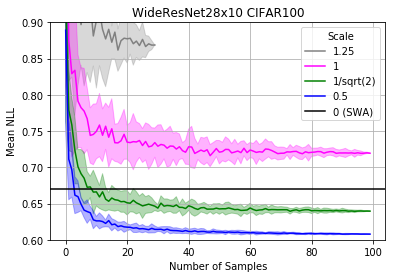

In [69]:
plot_error_bar(range(30), np.mean(r_s12_run3_nlls, 1), 2*np.std(r_s12_run3_nlls,1), 
               label='1.25', color='gray', fb_alpha=0.3)
plot_error_bar(range(100), np.mean(r_s1_run3_nlls, 1), 2*np.std(r_s1_run3_nlls,1), 
               label='1', color='magenta', fb_alpha=0.3)
plot_error_bar(range(100), np.mean(r_s2_run3_nlls, 1), 2*np.std(r_s2_run3_nlls,1), 
               label='1/sqrt(2)', color='green', fb_alpha=0.3)
plot_error_bar(range(100), np.mean(r_run3_nlls, 1), 2*np.std(r_run3_nlls,1), 
               label='0.5', color='blue', fb_alpha=0.3)
plt.axhline(y=0.6706, label = '0 (SWA)', c='black')

plt.legend(title='Scale')
plt.grid()

plt.ylim((0.6, 0.9))
plt.ylabel('Mean NLL')
plt.xlabel('Number of Samples')
plt.title('WideResNet28x10 CIFAR100')
plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/pics/wrn_bma_c100_nll_scaling.pdf')
#plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/pics/wrn_bma_c100_nll.pdf')

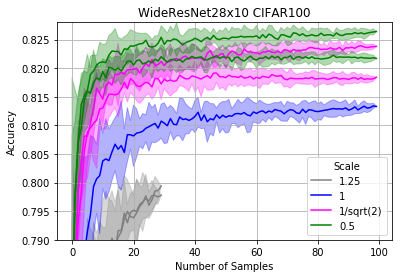

In [162]:
plt.fill_between(range(30), np.mean(r_s12_run2_accs,1)-2*np.std(r_s12_run2_accs,1),
                 np.mean(r_s12_run2_accs,1)+2*np.std(r_s12_run2_accs,1), color='gray', alpha=0.3)
plt.fill_between(range(30), np.mean(r_s12_run3_accs,1)-2*np.std(r_s12_run3_accs,1),
                 np.mean(r_s12_run3_accs,1)+2*np.std(r_s12_run3_accs,1), color='gray', alpha=0.3)
plt.plot(np.mean(r_s12_run2_accs,1), label='1.25', c='gray')
plt.plot(np.mean(r_s12_run3_accs,1), c='gray')

#plt.fill_between(range(100), np.mean(r_s1_run2_accs,1)-2*np.std(r_s1_run2_accs,1),
#                 np.mean(r_s1_run2_accs,1)+2*np.std(r_s1_run2_accs,1), color='blue', alpha=0.3)
plt.fill_between(range(100), np.mean(r_s1_run3_accs,1)-2*np.std(r_s1_run3_accs,1),
                 np.mean(r_s1_run3_accs,1)+2*np.std(r_s1_run3_accs,1), color='blue', alpha=0.3)
#plt.plot(np.mean(r_s1_run2_accs,1), label='1', c='blue')
plt.plot(np.mean(r_s1_run3_accs,1), c='blue', label='1')

plt.fill_between(range(100), np.mean(r_s2_run2_accs,1)-2*np.std(r_s2_run2_accs,1),
                 np.mean(r_s2_run2_accs,1)+2*np.std(r_s2_run2_accs,1), color='magenta', alpha=0.3)
plt.fill_between(range(100), np.mean(r_s2_run3_accs,1)-2*np.std(r_s2_run3_accs,1),
                 np.mean(r_s2_run3_accs,1)+2*np.std(r_s2_run3_accs,1), color='magenta', alpha=0.3)
plt.plot(np.mean(r_s2_run2_accs,1), label='1/sqrt(2)', c='magenta')
plt.plot(np.mean(r_s2_run3_accs,1), c='magenta')

plt.fill_between(range(100), np.mean(r_run2_accs,1)-2*np.std(r_run2_accs,1),
                 np.mean(r_run2_accs,1)+2*np.std(r_run2_accs,1), color='green', alpha=0.3)
plt.fill_between(range(100), np.mean(r_run3_accs,1)-2*np.std(r_run3_accs,1),
                 np.mean(r_run3_accs,1)+2*np.std(r_run3_accs,1), color='green', alpha=0.3)
plt.plot(np.mean(r_run2_accs,1), label='0.5', c='green')
plt.plot(np.mean(r_run3_accs,1), c='green')



plt.legend(title='Scale')
plt.grid()
plt.ylim((0.79, 0.828))
plt.ylabel('Accuracy')
plt.xlabel('Number of Samples')
plt.title('WideResNet28x10 CIFAR100')

plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/pics/wrn_bma_c100_scaling.pdf')

## Batch Norm 

In [70]:
wrn_run2_nobn = np.load('bma_results/wrn_nobn_run2_ensembles.npz')
wrn_run3_nobn = np.load('bma_results/wrn_scale_nobn_run3_ensembles.npz')

In [71]:
wrn_2_nobn_preds, wrn_2_nobn_targets = wrn_run2_nobn['predictions'], wrn_run2_nobn['targets']
wrn_3_nobn_preds, wrn_3_nobn_targets = wrn_run3_nobn['predictions'], wrn_run3_nobn['targets']


In [72]:
r_nobn_run2_accs = np.zeros((30, 10))
r_nobn_run3_accs = np.zeros((30, 10))

r_nobn_run2_nlls = np.zeros((30, 10))
r_nobn_run3_nlls = np.zeros((30, 10))

for i in range(10):
    r_nobn_run2_accs[:, i], r_nobn_run2_nlls[:, i] = cum_pred(wrn_2_nobn_preds, wrn_2_nobn_targets , randomize=True)
    r_nobn_run3_accs[:, i], r_nobn_run3_nlls[:, i] = cum_pred(wrn_3_nobn_preds, wrn_3_nobn_targets, randomize=True)

0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20
0
10
20


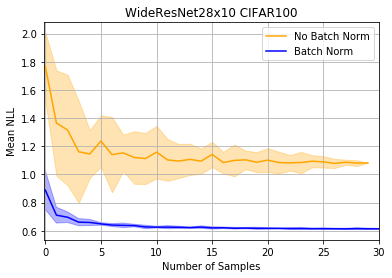

In [79]:
plot_error_bar(range(30), np.mean(r_nobn_run3_nlls, 1), 2*np.std(r_nobn_run3_nlls,1), 
               label='No Batch Norm', color='orange', fb_alpha=0.3)
plot_error_bar(range(100), np.mean(r_run3_nlls, 1), 2*np.std(r_run3_nlls,1), 
               label='Batch Norm', color='blue', fb_alpha=0.3)

plt.xlim((-0.1, 30))
plt.xlabel('Number of Samples')
plt.ylabel('Mean NLL')
plt.title('WideResNet28x10 CIFAR100')
plt.grid()
plt.legend()
plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/pics/wrn_bma_c100_bn_nll.pdf')

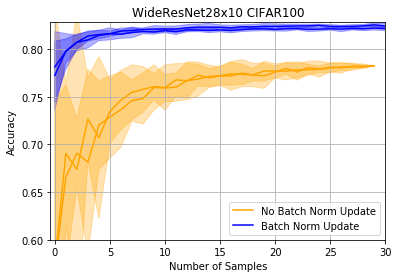

In [179]:
plt.fill_between(range(30), np.mean(r_nobn_run2_accs,1)-2*np.std(r_nobn_run2_accs,1),
                 np.mean(r_nobn_run2_accs,1)+2*np.std(r_nobn_run2_accs,1), color='orange', alpha=0.3)
plt.fill_between(range(30), np.mean(r_nobn_run3_accs,1)-2*np.std(r_nobn_run3_accs,1),
                 np.mean(r_nobn_run3_accs,1)+2*np.std(r_nobn_run3_accs,1), color='orange', alpha=0.3)
plt.plot(np.mean(r_nobn_run2_accs,1), label='No Batch Norm Update', c='orange')
plt.plot(np.mean(r_nobn_run3_accs,1), c='orange')

plt.fill_between(range(100), np.mean(r_run2_accs,1)-2*np.std(r_run2_accs,1),
                 np.mean(r_run2_accs,1)+2*np.std(r_run2_accs,1), color='blue', alpha=0.3)
plt.fill_between(range(100), np.mean(r_run3_accs,1)-2*np.std(r_run3_accs,1),
                 np.mean(r_run3_accs,1)+2*np.std(r_run3_accs,1), color='blue', alpha=0.3)
plt.plot(np.mean(r_run2_accs,1), label='Batch Norm Update', c='blue')
plt.plot(np.mean(r_run3_accs,1), c='blue')


plt.legend()
plt.grid()
plt.xlim((-0.4,30))
plt.ylim((0.6, 0.828))
plt.ylabel('Accuracy')
plt.xlabel('Number of Samples')
plt.title('WideResNet28x10 CIFAR100')
plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/pics/wrn_c100_bn.pdf')

In [77]:
swag_run2 = {'acc': r_run2_accs, 'nll': r_run2_nlls}
swag_run3 = {'acc': r_run3_accs, 'nll': r_run3_nlls}

swag_diag_run2 = {'acc': r_run2_diag_accs, 'nll': r_run2_diag_nlls}
swag_diag_run3 = {'acc': r_run3_diag_accs, 'nll': r_run3_diag_nlls}

swag_scale_1_run3 = {'acc': r_s1_run3_accs, 'nll': r_s1_run3_nlls}

swag_scale_s2_run2 = {'acc': r_s2_run2_accs, 'nll': r_s2_run2_nlls}
swag_scale_s2_run3 = {'acc': r_s2_run3_accs, 'nll': r_s2_run3_nlls}

swag_scale_125_run2 = {'acc': r_s12_run2_accs, 'nll': r_s12_run2_nlls}
swag_scale_125_run3 = {'acc': r_s12_run3_accs, 'nll': r_s12_run3_nlls}

swag_nobn_run2 = {'acc': r_nobn_run2_accs, 'nll': r_nobn_run2_nlls}
swag_nobn_run3 = {'acc': r_nobn_run3_accs, 'nll': r_nobn_run3_nlls}

In [78]:
np.savez(file='wrn_bma_c100.npz', 
         swag={'run2': swag_run2, 'run3':swag_run3, 'scale':0.5, 'bn':True},
         swag_diag={'run2':swag_diag_run2, 'run3':swag_diag_run3, 'scale':1.0, 'bn':True},
         swag_scale_1={'run2':None, 'run3': swag_scale_1_run3, 'scale':1.0, 'bn':True},
         swag_scale_1s2={'run2':swag_scale_s2_run2, 'run3':swag_scale_s2_run3, 'scale':1/(2**0.5), 'bn':True},
         swag_scale_125={'run2':swag_scale_125_run2, 'run3':swag_scale_125_run3, 'scale':1.25, 'bn':True},
         swag_nobn = {'run2':swag_nobn_run2, 'run3':swag_nobn_run3, 'scale':0.5, 'bn':False},
        )